In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
car_prices = pd.read_csv("CarPrice_Assignment.csv")

In [424]:
car_prices.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [425]:
car_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [426]:
#making lists of numerical and categorical values
num_var = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
cat_var = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'car_name']

#retaining only Company names from Car names
CompanyName = car_prices['CarName'].apply(lambda x : x.split(' ')[0])
car_prices.insert(3,"CompanyName",CompanyName)
car_prices.drop(['CarName'],axis=1,inplace=True)
car_prices.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [427]:
car_prices.CompanyName.unique() #checking for redundancy/errors in company names

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [428]:
#editing redundant/incorrect company names
car_prices.CompanyName.replace('maxda','mazda',inplace=True)
car_prices.CompanyName.replace('Nissan','nissan',inplace=True)
car_prices.CompanyName.replace('porcshce','porsche',inplace=True)
car_prices.CompanyName.replace('toyouta','toyota',inplace=True)
car_prices.CompanyName.replace('vokswagen','volkswagen',inplace=True)
car_prices.CompanyName.replace('vw','volkswagen',inplace=True)
car_prices.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

<AxesSubplot:>

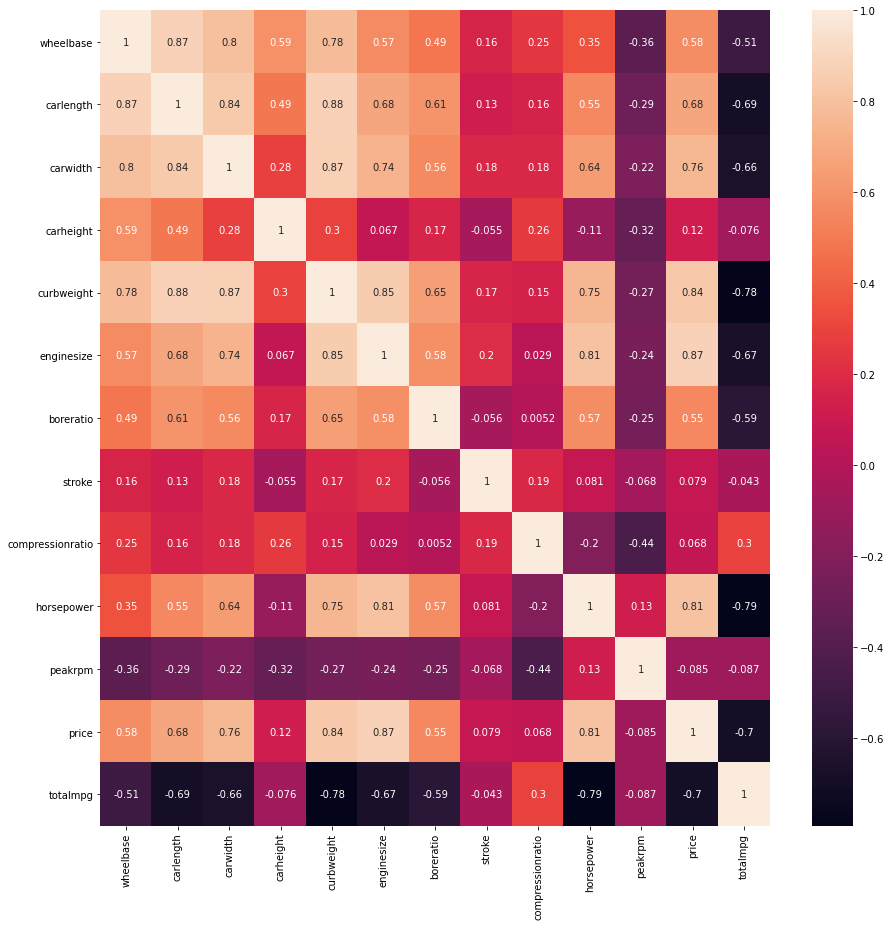

In [429]:

#Replacing citympg and highwaympg using formula; Dropping car_ID as it is not a required predictor.
car_prices['totalmpg'] = 0.55 * car_prices['citympg'] + 0.45 * car_prices['highwaympg']
car_prices.drop(['citympg', 'highwaympg'],axis=1,inplace=True)
car_prices.drop(['car_ID'],axis=1,inplace=True)
car_prices.head()

#Since symboling is a categorical vehicle, we convert its datatype to string to avoid confusion
car_prices.symboling=car_prices.symboling.astype(str)

#plotting heatmap to understand correlation
car_prices.head()
plt.figure(figsize=[15,15])
sns.heatmap(car_prices.corr(),annot=True)

In [430]:
#dropping variables which have less correlation
car_prices.drop(['wheelbase','carheight','boreratio','stroke', 'compressionratio','peakrpm'],axis=1,inplace=True)
car_prices.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,price,totalmpg
0,3,alfa-romero,gas,std,two,convertible,rwd,front,168.8,64.1,2548,dohc,four,130,mpfi,111,13495.0,23.70
1,3,alfa-romero,gas,std,two,convertible,rwd,front,168.8,64.1,2548,dohc,four,130,mpfi,111,16500.0,23.70
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,171.2,65.5,2823,ohcv,six,152,mpfi,154,16500.0,22.15
3,2,audi,gas,std,four,sedan,fwd,front,176.6,66.2,2337,ohc,four,109,mpfi,102,13950.0,26.70
4,2,audi,gas,std,four,sedan,4wd,front,176.6,66.4,2824,ohc,five,136,mpfi,115,17450.0,19.80


In [431]:
car_prices.shape

(205, 18)

<AxesSubplot:>

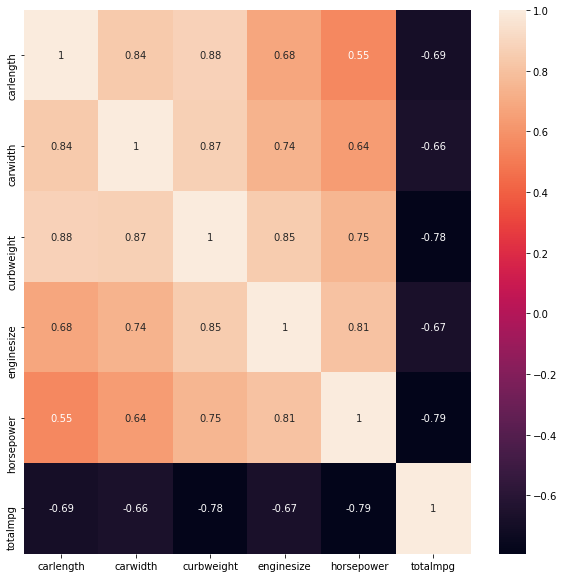

In [432]:
#Checking Multicollinearity
plt.figure(figsize=[10,10])
sns.heatmap(car_prices.drop('price',axis=1).corr(),annot=True)

In [433]:
#Since enginesize, curbweight, horsepower and totalmpg are highly correlated, we must retain only one of these variables in order to avoid multicollinearity.
predictors=car_prices['horsepower']
target=car_prices['price']
import statsmodels.api as sm
predictors= sm.add_constant(predictors)
lm_1 = sm.OLS(target,predictors).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           1.48e-48
Time:                        00:10:37   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3721.7615    929.849     -4.003      0.0

In [434]:
predictors=car_prices['curbweight']
target=car_prices['price']
import statsmodels.api as sm
predictors= sm.add_constant(predictors)
lm_1 = sm.OLS(target,predictors).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     468.6
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           1.21e-54
Time:                        00:10:38   Log-Likelihood:                -2009.8
No. Observations:                 205   AIC:                             4024.
Df Residuals:                     203   BIC:                             4030.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.948e+04   1543.962    -12.614      0.0

In [435]:
predictors=car_prices['enginesize']
target=car_prices['price']
import statsmodels.api as sm
predictors= sm.add_constant(predictors)
lm_1 = sm.OLS(target,predictors).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     657.6
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           1.35e-65
Time:                        00:10:38   Log-Likelihood:                -1984.4
No. Observations:                 205   AIC:                             3973.
Df Residuals:                     203   BIC:                             3979.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8005.4455    873.221     -9.168      0.0

In [436]:
predictors=car_prices['totalmpg']
target=car_prices['price']
import statsmodels.api as sm
predictors= sm.add_constant(predictors)
lm_1 = sm.OLS(target,predictors).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     191.0
Date:                Sun, 02 Jan 2022   Prob (F-statistic):           4.74e-31
Time:                        00:10:39   Log-Likelihood:                -2064.5
No. Observations:                 205   AIC:                             4133.
Df Residuals:                     203   BIC:                             4140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.645e+04   1724.687     21.137      0.0

In [437]:
car_prices.drop(['horsepower','curbweight','totalmpg'],axis=1,inplace=True)

In [438]:
car_prices.shape

(205, 15)

In [439]:
car_prices=pd.get_dummies(car_prices)
cols_to_drop=car_prices.corr()[(car_prices.corr()['price']<=0.5) & (car_prices.corr()['price']>=-0.5)]
cols_to_drop=cols_to_drop.reset_index()['index']
cols_to_drop=list(cols_to_drop)
car_prices.drop(cols_to_drop,axis=1,inplace=True)
car_prices.head()

,carlength,carwidth,enginesize,price,CompanyName_buick,drivewheel_fwd,drivewheel_rwd,cylindernumber_four,fuelsystem_2bbl,fuelsystem_mpfi
0,168.8,64.1,130,13495.0,0,0,1,1,0,1
1,168.8,64.1,130,16500.0,0,0,1,1,0,1
2,171.2,65.5,152,16500.0,0,0,1,0,0,1
3,176.6,66.2,109,13950.0,0,1,0,1,0,1
4,176.6,66.4,136,17450.0,0,0,0,0,0,1


<AxesSubplot:>

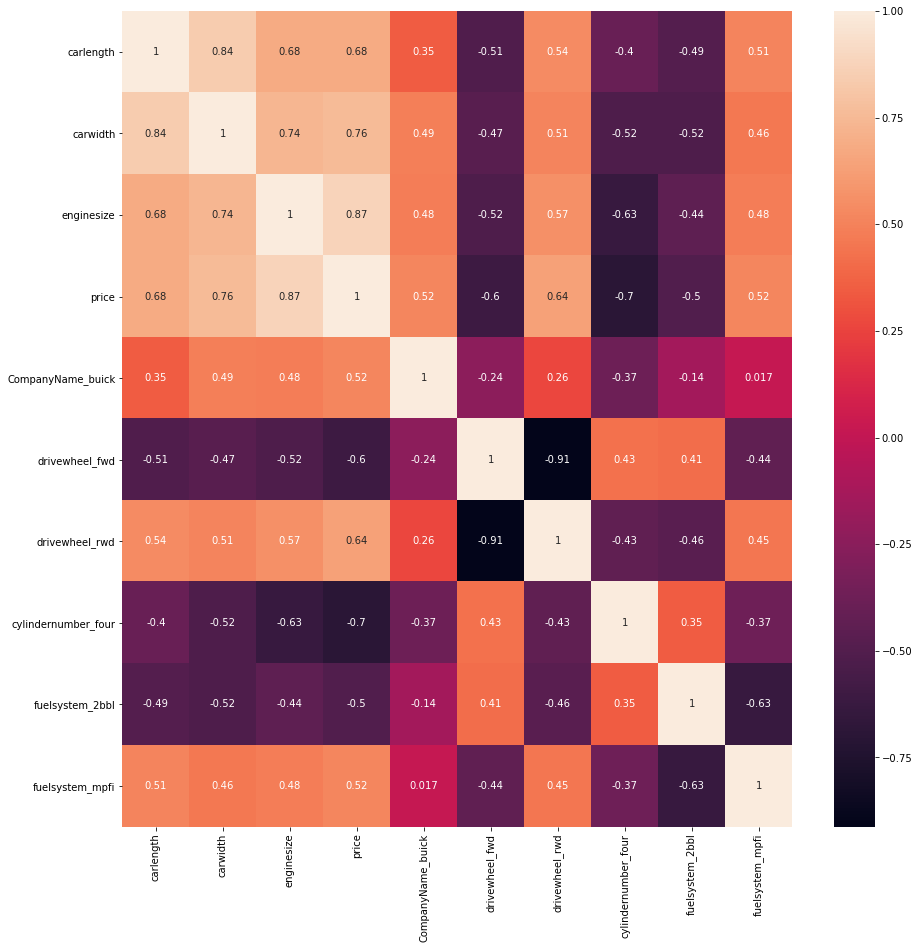

In [440]:
plt.figure(figsize=[15,15])
sns.heatmap(car_prices.corr(),annot=True)

In [441]:
car_prices.drop(['carwidth', 'CompanyName_buick','fuelsystem_2bbl', 'fuelsystem_mpfi'],axis=1,inplace=True)
car_prices.shape

(205, 6)

In [442]:
car_prices.head()

,carlength,enginesize,price,drivewheel_fwd,drivewheel_rwd,cylindernumber_four
0,168.8,130,13495.0,0,1,1
1,168.8,130,16500.0,0,1,1
2,171.2,152,16500.0,0,1,0
3,176.6,109,13950.0,1,0,1
4,176.6,136,17450.0,0,0,0


In [443]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(car_prices, train_size = 0.7, test_size = 0.3, random_state = 100)
df_train.shape

(143, 6)

In [444]:
y_train = df_train.pop('price')
x_train = df_train

In [445]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
y_train = y_train.reshape((y_train.shape[0], 1))

In [446]:
n = x_train.shape[1]
m = y_train.shape[0]

In [447]:
def featureNormalize(x):
    mu = np.zeros((1, np.size(x, 1)))
    sigma = np.zeros((1, np.size(x, 1)))
    x_norm = np.divide((x - np.mean(x, axis=0)), (np.std(x, axis=0)))
    return list((x_norm, mu, sigma))


def h(x,theta):
        return np.dot(x, theta)
    
    
def costFunction(x, y, theta):
        m = len(y)
        return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*m)
    

def gradientDescent(x, y, theta, alpha, num_iters):
        m = len(y)
        J_history = []
        for i in range(num_iters):
            theta = theta - (alpha/m) * np.dot(x.T, (h(x, theta) - y))
            J_history.append(costFunction(x, y, theta)) 
        return theta, J_history
    
    
if n > 1:
    x_train, mu, sigma = featureNormalize(x_train)
    
import random
theta = []
for i in range(0,5):
    n = random.uniform(-1,1)
    theta.append(n)

theta = np.array(theta)
theta = theta.reshape((x_train.shape[1],1))
# theta = theta.reshape(n, 1)
alpha = 0.5
num_iters = 65
theta, J_hist = gradientDescent(x_train, y_train, theta, alpha, num_iters)
J = costFunction(x_train, y_train, theta)
print("Cost: ", J)
print("Parameters: ", theta)




Cost:  [[90215268.66586134]]
Parameters:  [[ 1091.93046644]
 [ 4150.0460029 ]
 [ -548.2282417 ]
 [  907.33519332]
 [-1661.55306099]]


In [449]:
y_test = df_test.pop('price')
x_test = df_test
if n > 1:
    x_test, mu, sigma = featureNormalize(x_test)

In [450]:
def test(theta, x):
	y_pred = np.dot(x, theta)
	return y_pred
    
y_pred = test(theta, x_test)

In [451]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-7898.605639067591